# Steady-state simulation of organic light emitting cell

This attempts to reproduce J. C. deMello, [Interfacial feedback dynamics in polymer light-emitting electrochemical cells](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.66.235210), Physical Review B 66 235210 (2002). Exact agreement appears impossible because of missing details regarding contact model. Note that the temperature is assumed to be 2500 K. This greatly simplifies the simulation comparing with normal conditions.

In [1]:
from oedes.fvm import mesh1d
from oedes.models import lec
from oedes import progress, testing
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [2]:
params = {'T': 2500.,
          'electron.mu': 1e-6,
          'electron.level': 0.,
          'electron.N0': 5e26,
          'hole.mu': 1e-6,
          'hole.level': 5.,
          'hole.N0': 5e26,
          'electrode0.workfunction': 2.5,
          'electrode0.voltage': 2.,
          'electrode1.workfunction': 2.5,
          'electrode1.voltage': 0.,
          'cation.mu': 1e-6,
          'anion.mu': 1e-6,
          'npi': 2e43,
          'epsilon_r': 3.
          }

In [3]:
L = 350e-9
mesh = mesh1d(L=L, epsilon_r=3.4)
cinit = 1.25e25
model = lec.LEC(mesh)
xinit = lec.initial_salt(model, cinit)

In [4]:
for t, x, xt, outf in lec.bdf1adapt(
        model, xinit, params, t=0., t1=1., dt=1e-10, reltol=1, abstol=1e15, relfail=20.):
    progress(t)

1.0                   

In [5]:
o = outf()
m = mesh

(1e+23, 1e+27)

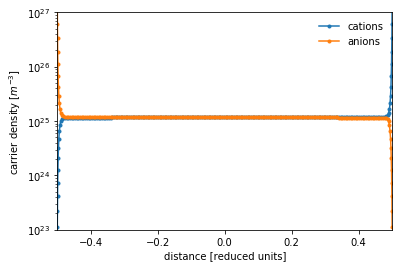

In [6]:
plt.plot(m.cells['center'] / L - 0.5, o['cation.c'], '.-', label='cations')
plt.plot(m.cells['center'] / L - 0.5, o['anion.c'], '.-', label='anions')
testing.store(o['cation.c'], rtol=1e-7)
testing.store(o['anion.c'], rtol=1e-7)
plt.yscale('log')
plt.legend(loc=0, frameon=False)
plt.ylabel('carrier density [$m^{-3}$]')
plt.xlabel('distance [reduced units]')
plt.xlim([-0.5, 0.5])
plt.ylim([1e23, 1e27])

Text(0,0.5,'electric field [$Vm^{-1}$]')

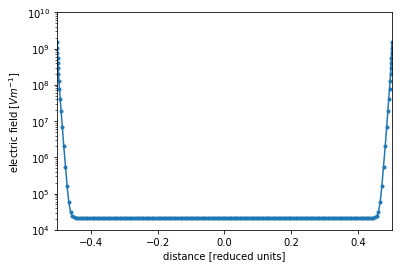

In [7]:
testing.store(o['E'], rtol=1e-7)
plt.plot(m.faces['center'] / L - 0.5, o['E'], '.-')
plt.yscale('log')
plt.ylim([1e4, 1e10])
plt.xlim([-0.5, 0.5])
plt.xlabel('distance [reduced units]')
plt.ylabel('electric field [$Vm^{-1}$]')

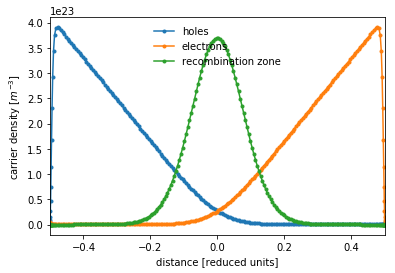

In [8]:
plt.plot(m.cells['center'] / L - 0.5, o['hole.c'], '.-', label='holes')
plt.plot(m.cells['center'] / L - 0.5, o['electron.c'], '.-', label='electrons')
plt.plot(
    m.cells['center'] /
    L -
    0.5,
    o['R'] *
    0.5e-7,
    '.-',
    label='recombination zone')
testing.store(o['hole.c'], rtol=1e-7)
testing.store(o['electron.c'], rtol=1e-7)
testing.store(o['R'], rtol=1e-7)
plt.xlabel('distance [reduced units]')
plt.ylabel('carrier density [$m^{-3}$]')
plt.xlim([-0.5, 0.5])
plt.legend(loc=0, frameon=False)

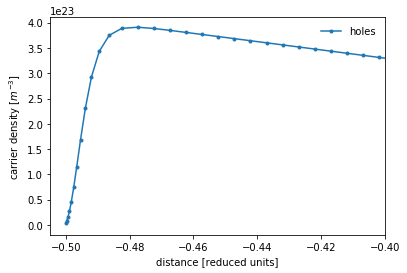

In [9]:
plt.plot(m.cells['center'] / L - 0.5, o['hole.c'], '.-', label='holes')
plt.xlabel('distance [reduced units]')
plt.ylabel('carrier density [$m^{-3}$]')
plt.xlim([-0.505, -0.4])
plt.legend(loc=0, frameon=False)

Text(0,0.5,'normalized current density')

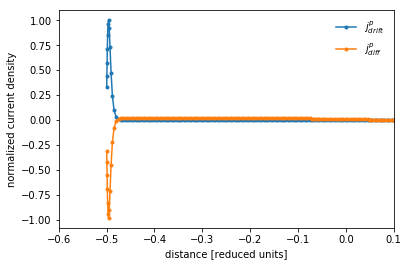

In [10]:
testing.store(o['hole.jdrift'], rtol=1e-7)
testing.store(o['hole.jdiff'], rtol=1e-7)
testing.store(o['electron.jdrift'], rtol=1e-7)
testing.store(o['electron.jdiff'], rtol=1e-7)
plt.plot(
    m.faces['center'] /
    L -
    0.5,
    o['hole.jdrift'] /
    np.amax(
        o['hole.jdrift']),
    '.-',
    label='$j^p_{drift}$')
plt.plot(
    m.faces['center'] /
    L -
    0.5,
    o['hole.jdiff'] /
    np.amax(
        o['hole.jdrift']),
    '.-',
    label='$j^p_{diff}$')
plt.xlim([-0.6, 0.1])
plt.legend(loc=0, frameon=False)
plt.xlabel('distance [reduced units]')
plt.ylabel('normalized current density')


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
